# **HOUSE PRICE PREDICTION**

# **Introduction**
In this notebook, we explore the factors affecting housing prices in a metropolitan area. Our goal is to analyze various attributes of houses and identify key predictors of their market prices. By leveraging statistical methods and machine learning algorithms, we aim to develop models that can accurately estimate house prices based on the given features.

# **Dataset Description**
The dataset includes detailed information on housing prices along with various characteristics of the houses.

We particularly focus on attributes such as 'Price', 'Bedrooms', 'Bathrooms', 'Square Footage', 'Location', and 'Year Built' to understand their impact on housing prices.

# **Dataset Overview**
This dataset compiles house sale prices along with numerous features of the houses, providing a comprehensive view of the real estate market. It includes data on house size, location, condition, and other relevant factors, allowing for an in-depth analysis of the determinants of house prices.

# **Attribute Descriptions**
**id:** Unique identifier for each house.

**date:** Date when the house was sold.

**price:** Sale price of the house.

**bedrooms:** Number of bedrooms in the house.

**bathrooms:** Number of bathrooms in the house.

**sqft_living:** Square footage of the interior living space.

**sqft_lot:** Square footage of the lot.

**floors:** Number of floors in the house.

**waterfront:** Whether the house has a waterfront view (1 if yes, 0 if no).

**view:** Quality of the view from the house (0 to 4).

**condition:** Condition of the house (1 to 5).

**grade:** Overall grade given to the house (1 to 13).

**sqft_above:** Square footage of the house apart from the basement.

**sqft_basement:** Square footage of the basement.

**yr_built:** Year the house was built.

**yr_renovated:** Year the house was renovated.

**zipcode:** Zip code where the house is located.

**lat: **Latitude coordinate of the house.

**long:** Longitude coordinate of the house.

**sqft_living15:** Square footage of interior living space in 2015 (if recent).

**sqft_lot15:** Square footage of the lot in 2015 (if recent).

# **This dataset can be utilized for:**
Analyzing the relationship between house features and their sale prices.

Developing predictive models to estimate house prices.

Identifying key factors that significantly influence real estate market trends.

# **Additional Information**
This dataset requires careful consideration of external factors such as economic conditions, local market trends, and seasonal effects, which might influence house prices and their fluctuations over time.

# **Data Loading and Preliminary Analysis**




In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = '/content/drive/My Drive/class_4_final_project_data (1).csv'

In [35]:
data = pd.read_csv(file_path)

In [26]:
data.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178.0,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125.0,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028.0,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074.0,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053.0,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003.0,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198.0,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146.0,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038.0,47.3684,-122.031,2390,7570


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21543 non-null  float64
 17  lat            21613 non-null  float64
 18  long  

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# **Questions for Analysis**

In this section, we outline key questions we aim to answer through our analysis of the housing price dataset:


> **What are the main factors influencing house prices?**




We will analyze how different features such as number of bedrooms, bathrooms, square footage, and location affect house prices.



> **Is there a significant difference in house prices based on the year built or year renovated?**



We will investigate if newer houses or recently renovated houses command higher prices.



> **How does the presence of a waterfront view impact house prices?**



We will compare the prices of houses with waterfront views to those without.


> **What is the relationship between house condition and price?**


We will explore whether houses in better condition sell for higher prices.


> **How do geographical factors (latitude, longitude, and zip code) influence house prices?**


We will assess the impact of location on house prices.


> **Can we build a predictive model to estimate house prices based on the given features?**


We will use machine learning techniques to create a model that predicts house prices.

# **Data Analysis**

**1. Main Factors Influencing House Prices**

Non-numeric columns: Index(['zipcode'], dtype='object')
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


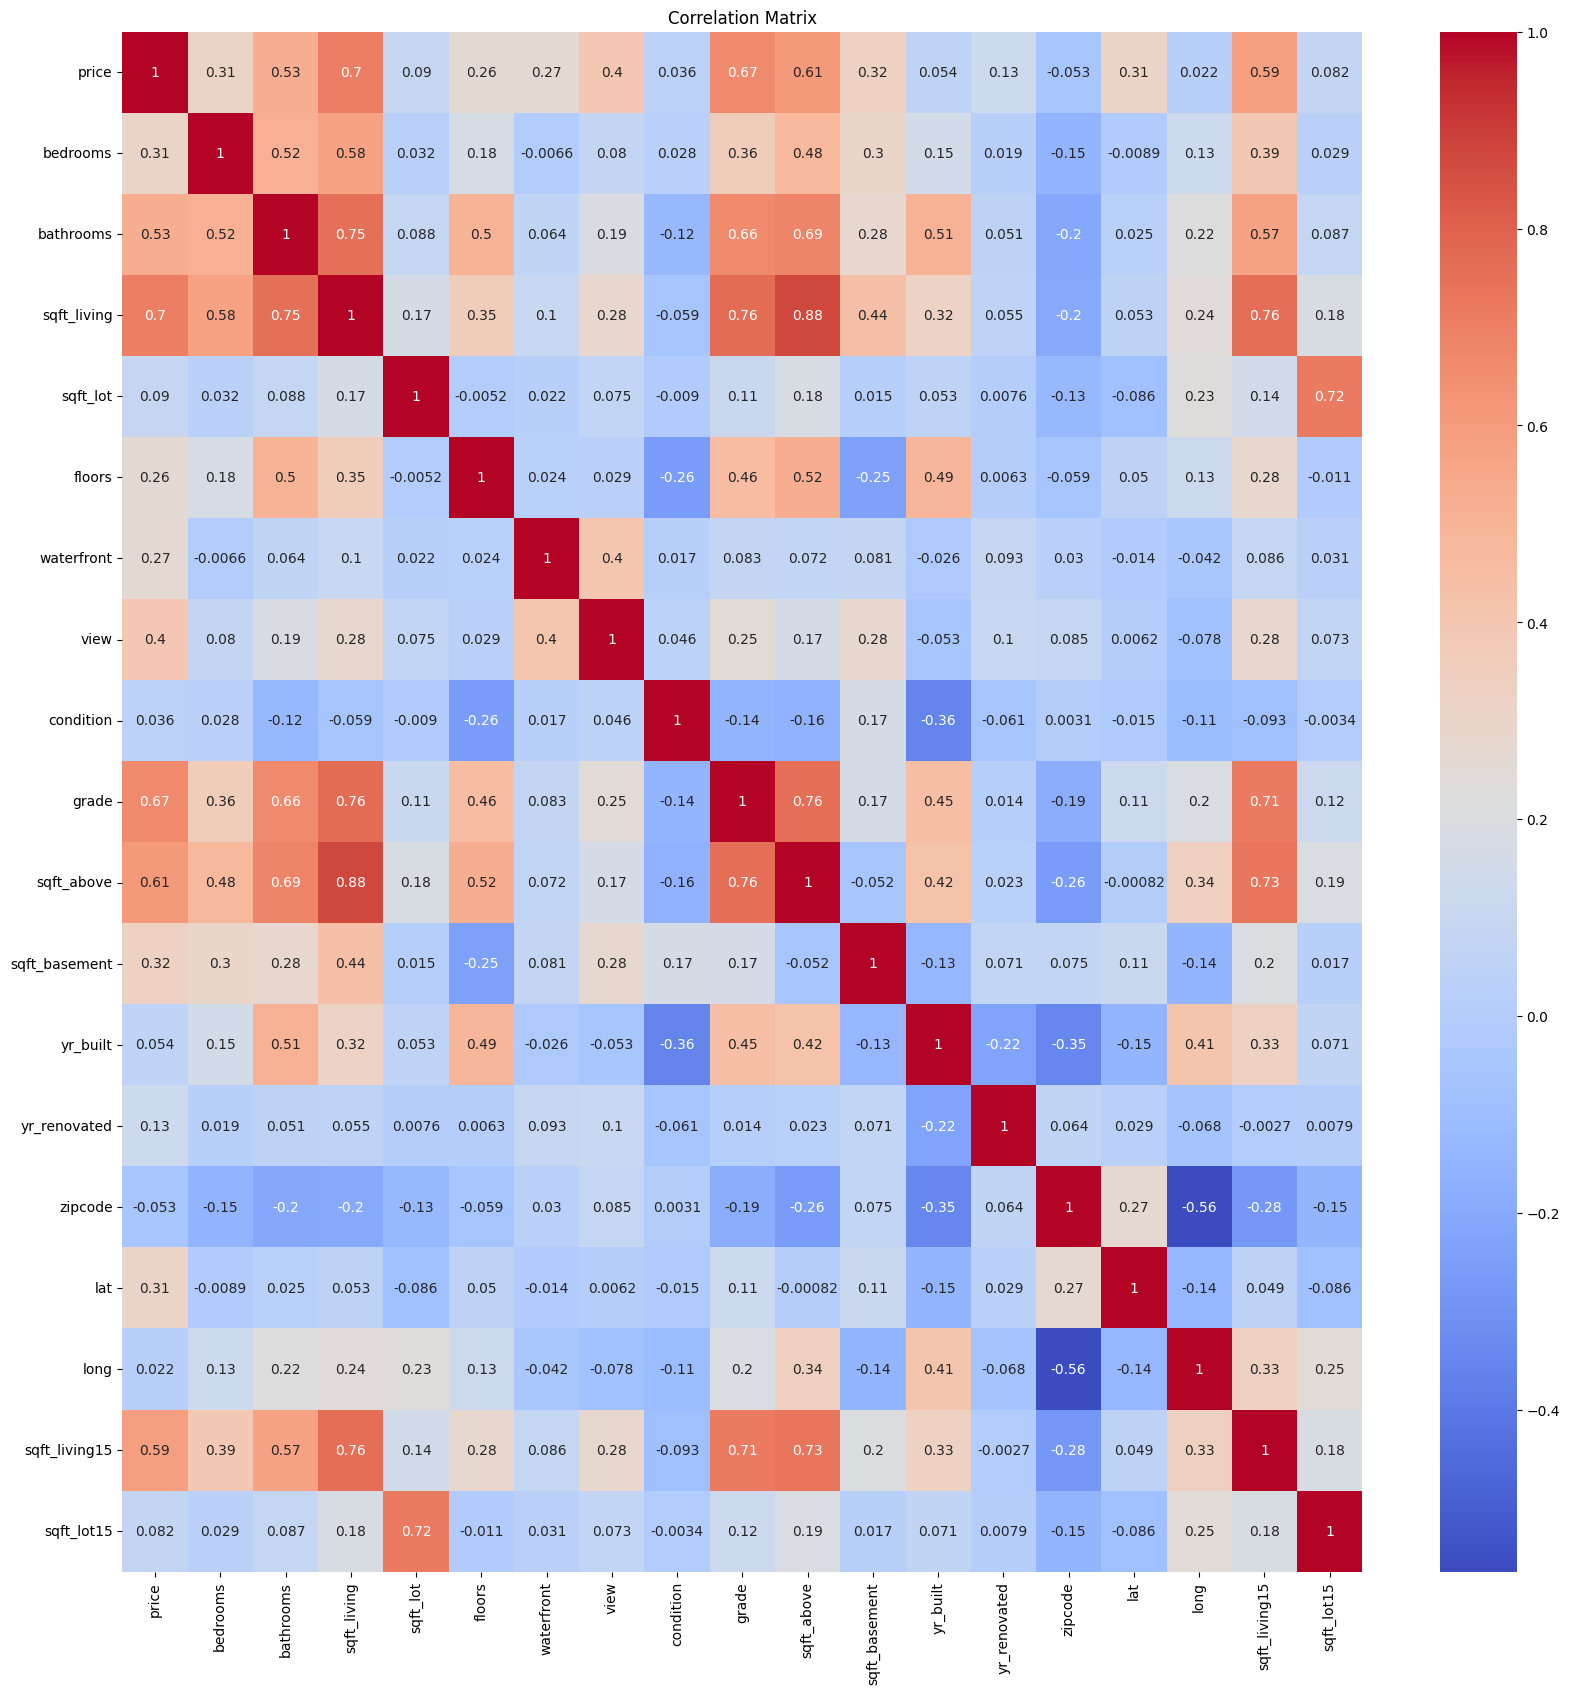

In [37]:
# Drop unnecessary columns
#data = data.drop(columns=['id', 'date'])

# Ensure there are no categorical variables causing issues
# Check for any non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[int, float]).columns
print("Non-numeric columns:", non_numeric_columns)

# Convert 'zipcode' to a string and one-hot encoding (optional)
data['zipcode'] = data['zipcode'].astype(str)
#data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)

# Check if there are any missing values
print(data.isnull().sum())

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [38]:
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation.head(10))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64


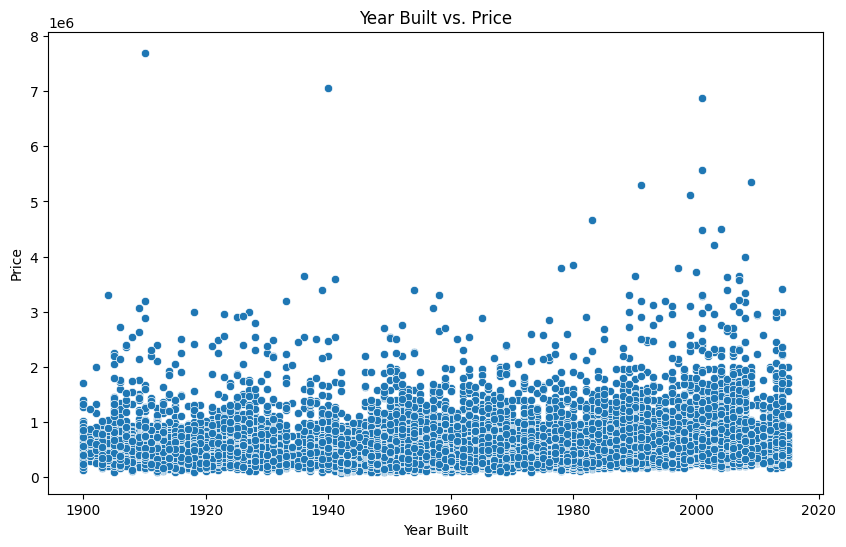

In [15]:
# Scatter plot of year built vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='price', data=data)
plt.title('Year Built vs. Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()




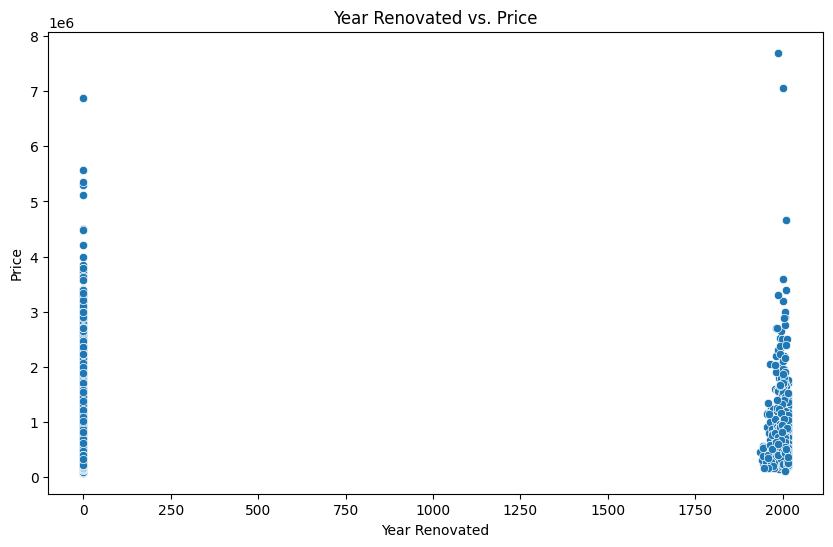

In [16]:
# Scatter plot of year renovated vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_renovated', y='price', data=data)
plt.title('Year Renovated vs. Price')
plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.show()


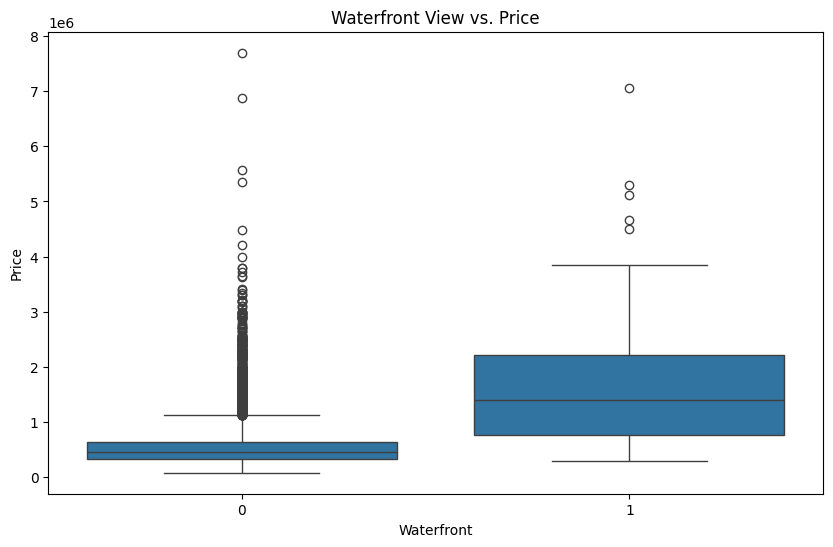

In [17]:
# Box plot of waterfront vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Waterfront View vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()


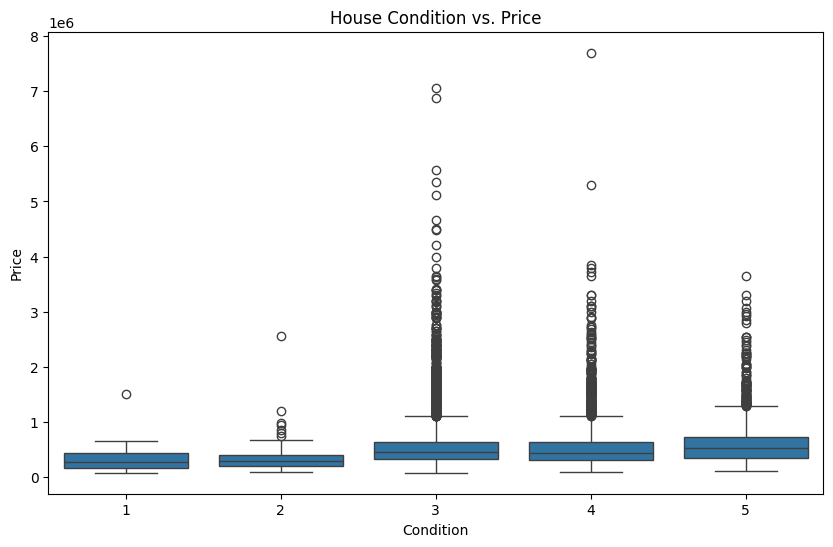

In [18]:
# Box plot of condition vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=data)
plt.title('House Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()



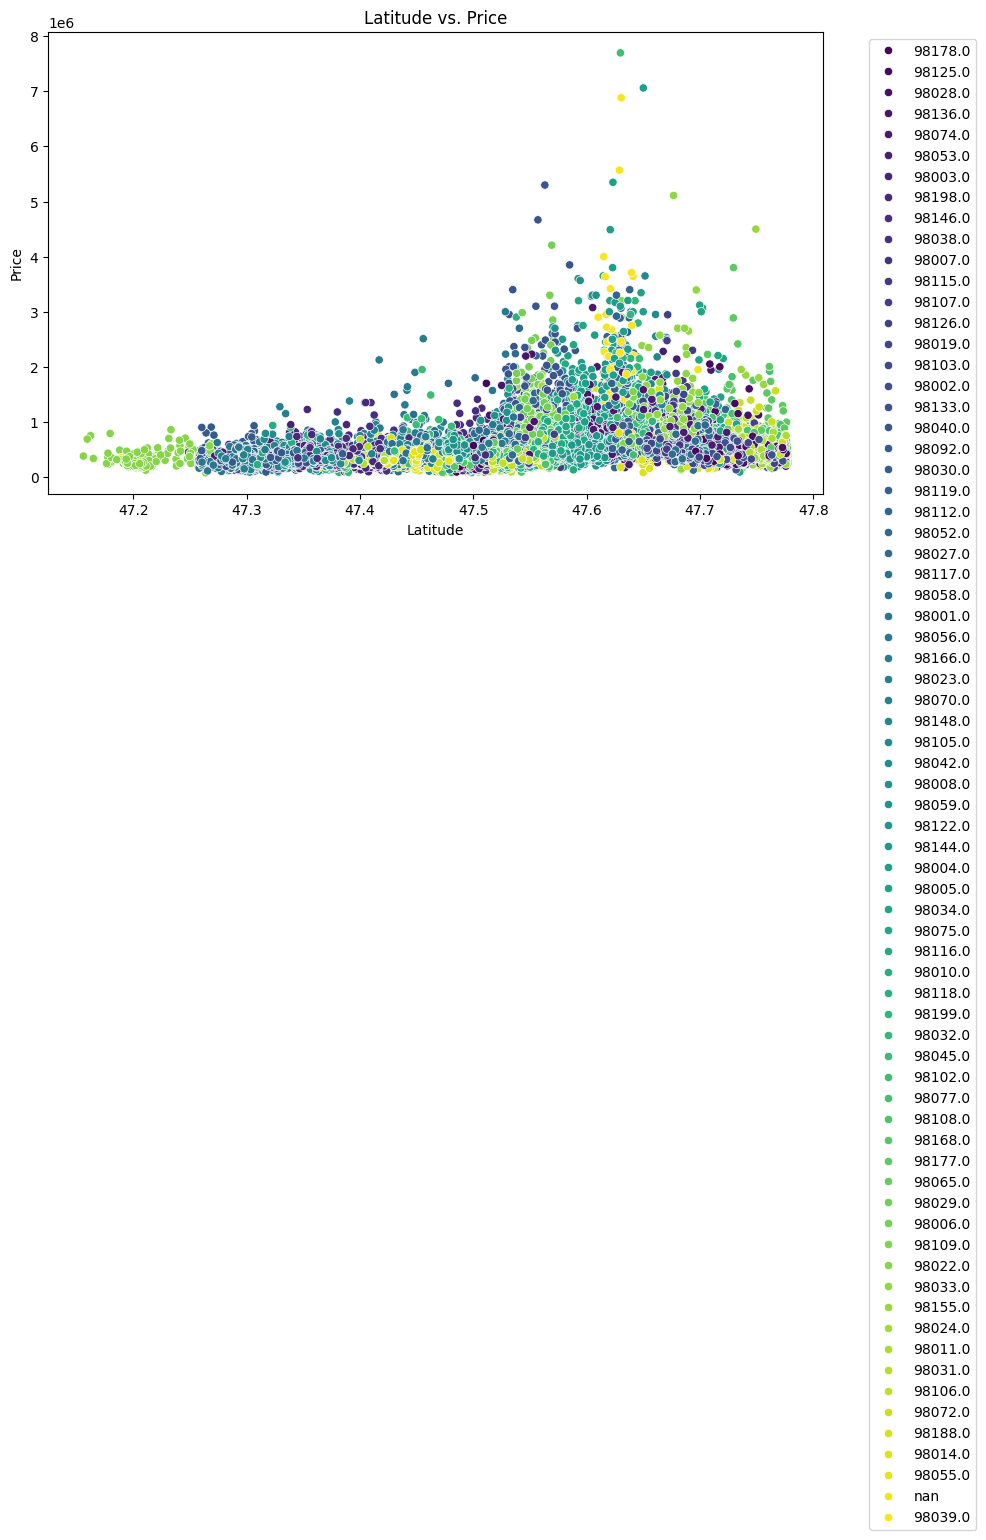

In [22]:
# Scatter plot of latitude and longitude vs. price
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='lat', y='price', data=data, hue='zipcode', palette='viridis')
plt.title('Latitude vs. Price')
plt.xlabel('Latitude')
plt.ylabel('Price')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


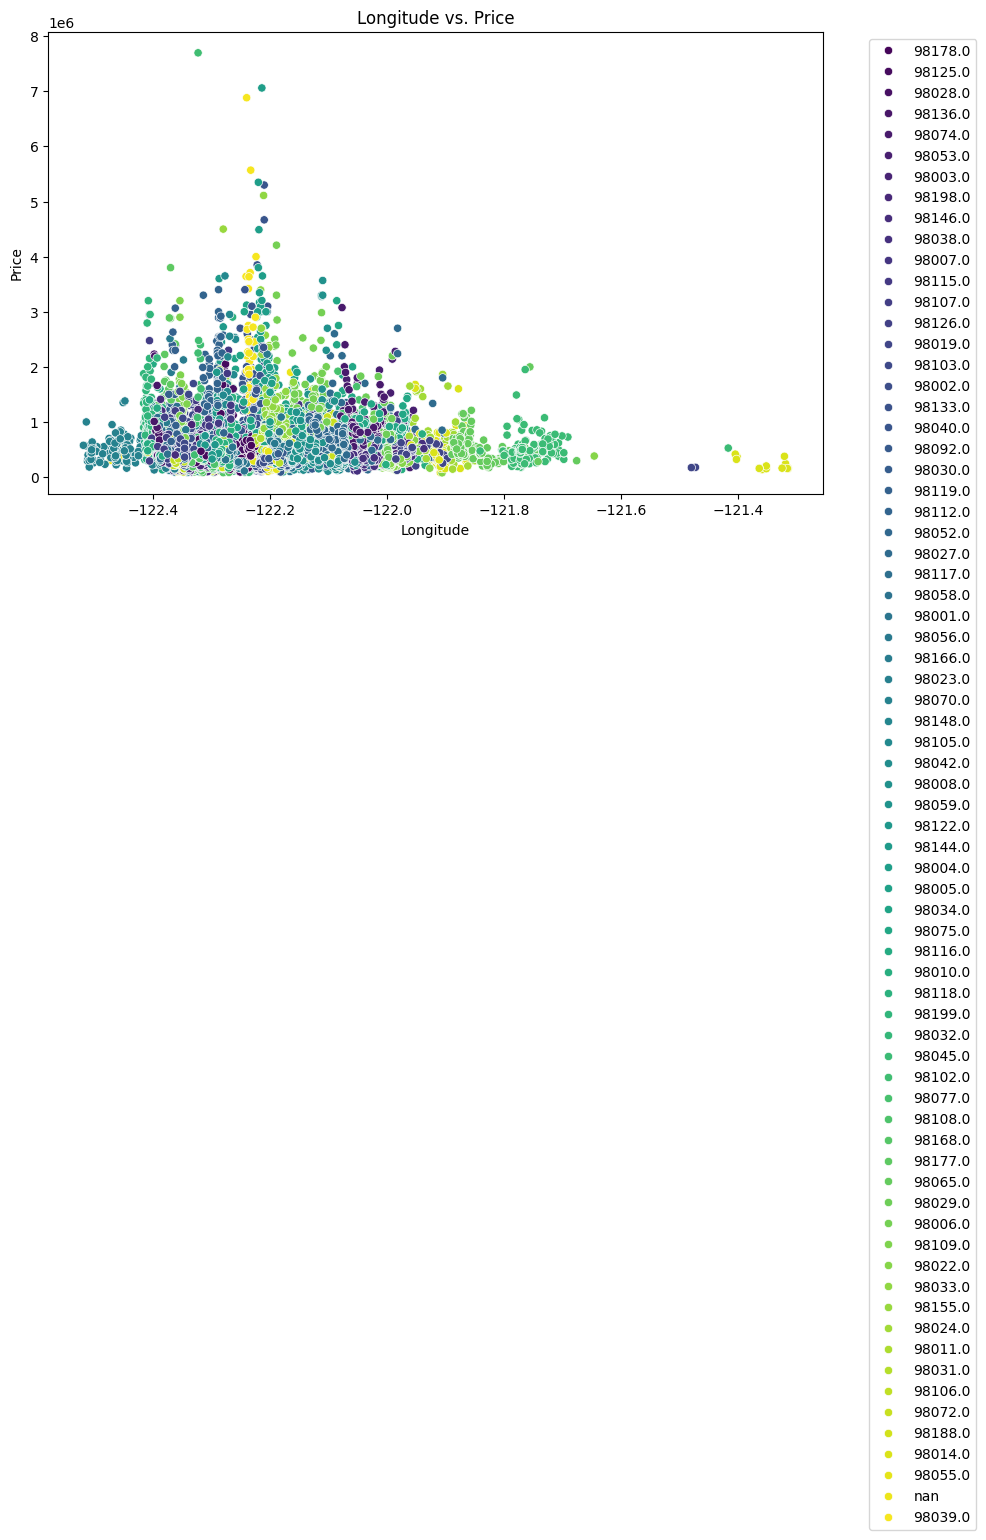

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='price', data=data, hue='zipcode', palette='viridis')
plt.title('Longitude vs. Price')
plt.xlabel('Longitude')
plt.ylabel('Price')

# Move the legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Mean Squared Error: 46253300178.018196
R² Score: 0.6940448069843483


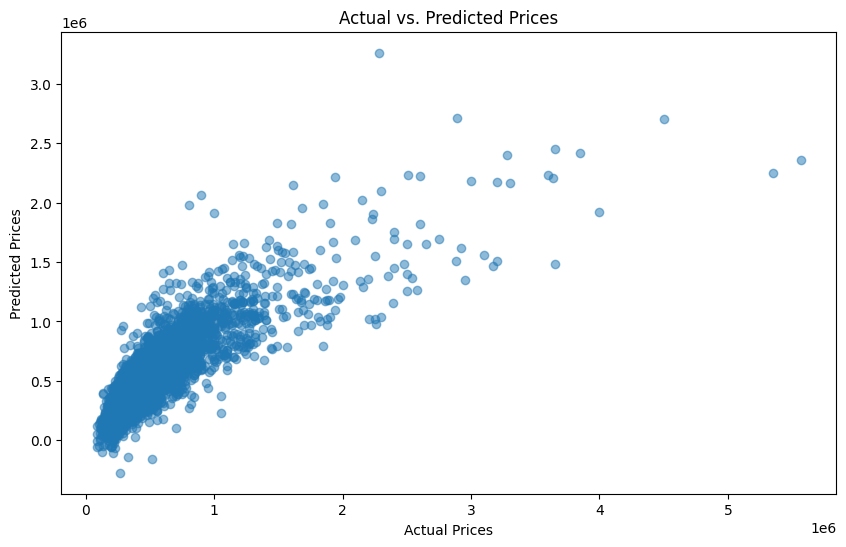

In [43]:

# Select features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
X = data[features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Display actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [40]:
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# First columns
print(comparison_df.head(10))

       Actual Price  Predicted Price
735        365000.0     4.559387e+05
2830       865000.0     7.709718e+05
4106      1038000.0     1.206075e+06
16218     1490000.0     1.634531e+06
19964      711000.0     7.370164e+05
1227       211000.0     2.661714e+05
18849      790000.0     8.041351e+05
19369      680000.0     5.462392e+05
20164      384500.0     3.811337e+05
7139       605000.0     4.702870e+05


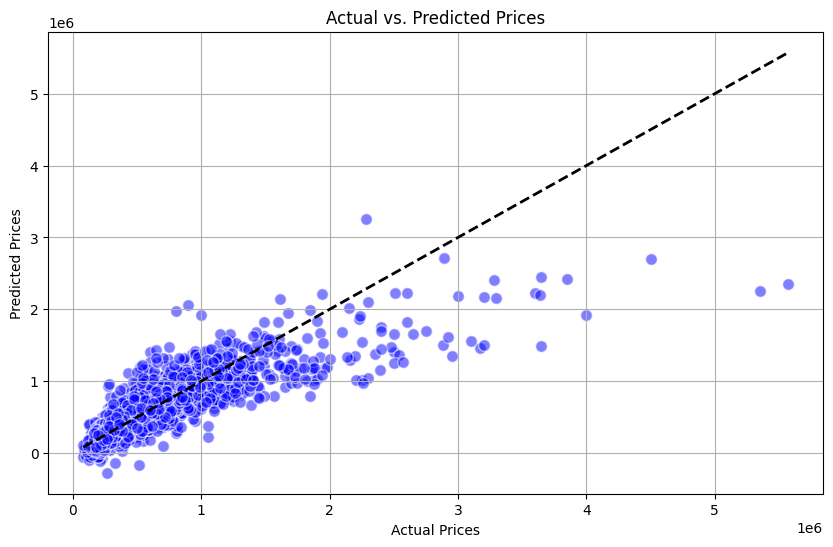

In [41]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', edgecolors='w', s=70)  # Renk ve stil değişiklikleri
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Doğru çizgisi
plt.show()

Mean Squared Error: 62130702967.989655
R² Score: 0.5890193533086857
       Actual Price  Predicted Price
735        365000.0         350000.0
2830       865000.0         825000.0
4106      1038000.0        1260500.0
16218     1490000.0        1550000.0
19964      711000.0        1095000.0
1227       211000.0         285900.0
18849      790000.0         808000.0
19369      680000.0         495000.0
20164      384500.0         399000.0
7139       605000.0         575000.0


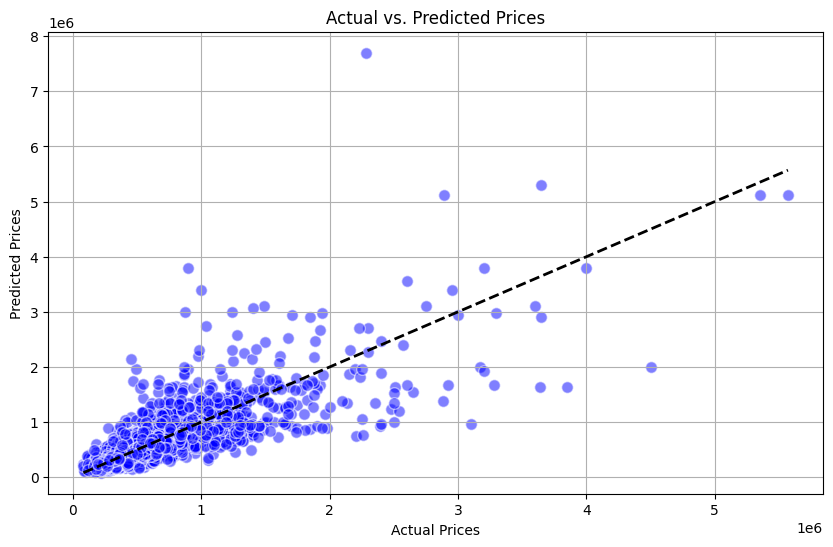

In [45]:
#data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)
features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'lat', 'view', 'bedrooms', 'floors', 'condition', 'waterfront']

# Seçilen özellikler ve hedef değişken
X = data[features]
y = data['price']

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini başlatın ve eğitin
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Test setinde ev fiyatlarını tahmin edin
y_pred = model.predict(X_test)

# Ortalama kare hatayı hesaplayın
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R² skorunu hesaplayın
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Gerçek ve tahmin edilen fiyatları bir DataFrame'e yerleştirin
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# İlk birkaç satırı görüntüleyin
print(comparison_df.head(10))

# Scatter plot'un stilini belirleyin
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', edgecolors='w', s=70)  # Renk ve stil değişiklikleri
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Doğru çizgisi
plt.show()


Mean Squared Error: 32851291363.502995
R² Score: 0.782696085441473
       Actual Price  Predicted Price
735        365000.0     3.720760e+05
2830       865000.0     8.329005e+05
4106      1038000.0     1.060434e+06
16218     1490000.0     1.588600e+06
19964      711000.0     8.323980e+05
1227       211000.0     2.531291e+05
18849      790000.0     1.030030e+06
19369      680000.0     6.849165e+05
20164      384500.0     3.978913e+05
7139       605000.0     5.600975e+05


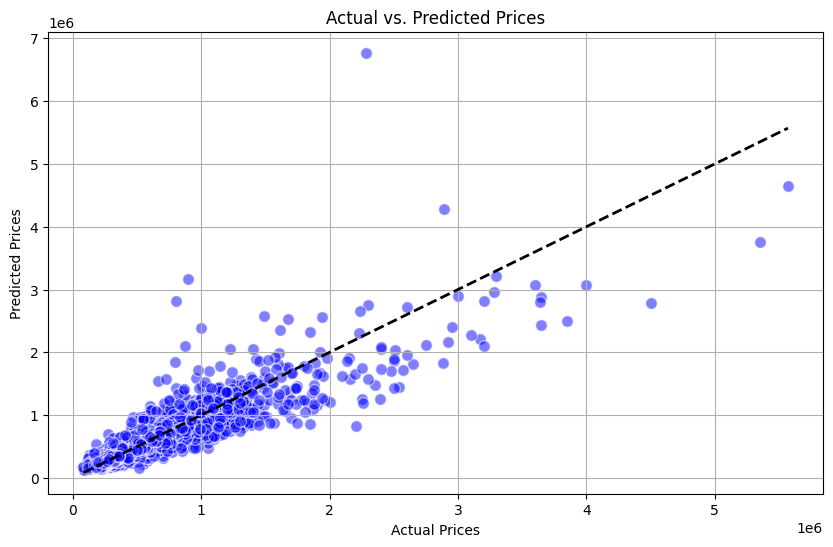

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest modelini başlatın ve eğitin
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test setinde ev fiyatlarını tahmin edin
y_pred = model.predict(X_test)

# Ortalama kare hatayı hesaplayın
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R² skorunu hesaplayın
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Gerçek ve tahmin edilen fiyatları bir DataFrame'e yerleştirin
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# İlk birkaç satırı görüntüleyin
print(comparison_df.head(10))

# Scatter plot'un stilini belirleyin
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', edgecolors='w', s=70)  # Renk ve stil değişiklikleri
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Doğru çizgisi
plt.show()


Mean Squared Error: 32410217218.917786
R² Score: 0.7856136918505593
       Actual Price  Predicted Price
735        365000.0     3.872880e+05
2830       865000.0     9.000453e+05
4106      1038000.0     1.205303e+06
16218     1490000.0     1.665827e+06
19964      711000.0     7.961893e+05
1227       211000.0     2.732503e+05
18849      790000.0     9.296585e+05
19369      680000.0     6.015368e+05
20164      384500.0     4.360032e+05
7139       605000.0     5.273618e+05


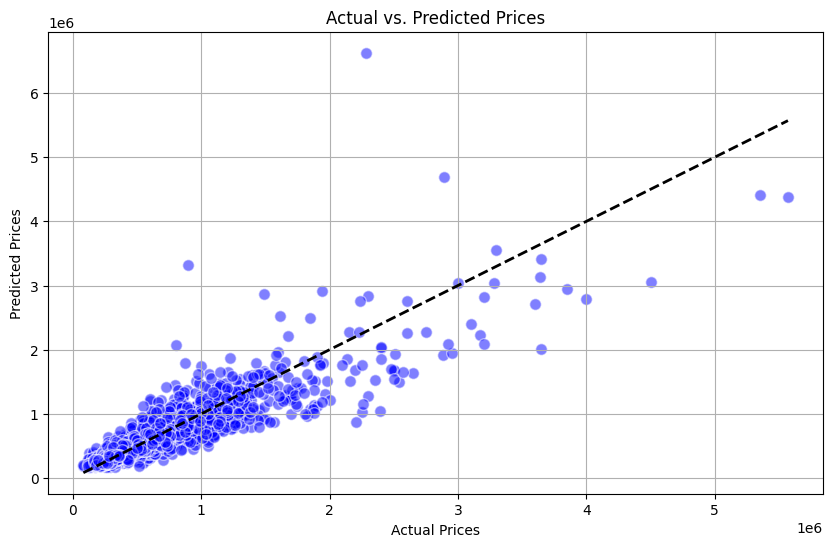

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting modelini başlatın ve eğitin
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Test setinde ev fiyatlarını tahmin edin
y_pred = model.predict(X_test)

# Ortalama kare hatayı hesaplayın
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R² skorunu hesaplayın
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Gerçek ve tahmin edilen fiyatları bir DataFrame'e yerleştirin
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# İlk birkaç satırı görüntüleyin
print(comparison_df.head(10))

# Scatter plot'un stilini belirleyin
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', edgecolors='w', s=70)  # Renk ve stil değişiklikleri
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Doğru çizgisi
plt.show()


Mean Squared Error: 37689383756.243164
R² Score: 0.7506931908123053
       Actual Price  Predicted Price
735        365000.0     3.983959e+05
2830       865000.0     9.004309e+05
4106      1038000.0     1.079854e+06
16218     1490000.0     1.797407e+06
19964      711000.0     8.097682e+05
1227       211000.0     2.818147e+05
18849      790000.0     9.437505e+05
19369      680000.0     6.231942e+05
20164      384500.0     4.356506e+05
7139       605000.0     5.158789e+05


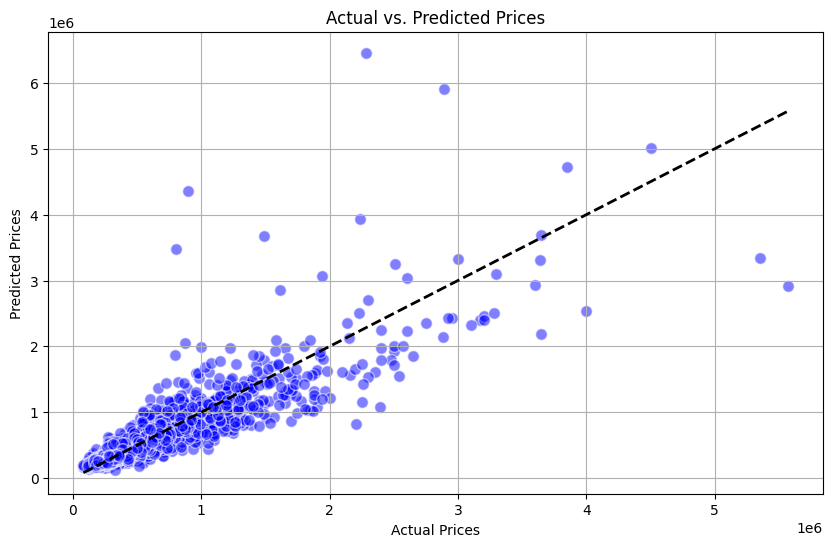

In [49]:
import xgboost as xgb

# XGBoost modelini başlatın ve eğitin
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Test setinde ev fiyatlarını tahmin edin
y_pred = model.predict(X_test)

# Ortalama kare hatayı hesaplayın
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R² skorunu hesaplayın
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Gerçek ve tahmin edilen fiyatları bir DataFrame'e yerleştirin
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# İlk birkaç satırı görüntüleyin
print(comparison_df.head(10))

# Scatter plot'un stilini belirleyin
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', edgecolors='w', s=70)  # Renk ve stil değişiklikleri
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Doğru çizgisi
plt.show()
